<a href="https://colab.research.google.com/github/AvRob0/Avrob0.github.io/blob/main/RobinsonAveryExoPlanetdataset1_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
exo_pl_dta = pd.read_csv("/content/Exoplanet_2024_April_06.csv")

In [3]:
# prompt: create a DataFrame from exo_pl_dta with all rows and columns

exo_pl_dta_df = pd.DataFrame(exo_pl_dta)


In [4]:
# Drop all rows with any missing values
exo_pl_dta_df = exo_pl_dta_df.dropna()

# Save the cleaned DataFrame to a new CSV file
exo_pl_dta_df.to_csv("cleaned_exoplanet_data.csv", index=False)

In [7]:
# prompt: With exo_pl_dta DataFrame make a Machine Learning algorithm to predict the behavior of orbital_period
# With this prediction vs actual was something I played around with the features
# by trying different order and with swapping between the the x and y values with the features to get different results
# To see which ones would seem more accurate

# Separate features and target
X = exo_pl_dta_df[['planet_mass_(earth_mass)', 'planet_mass_(jupiter_mass)', 'planet_eccentricity' ]]
y = exo_pl_dta_df[['insolution_flux', 'orbital_period', 'orbit_semi_major_axis_au', 'planet_radius_(jupiter_radius)', 'planet_radius_(earth_radius)', 'distance_(parsecs)']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)

# Print the model score and predictions
print("Model score:", score)
print("Predictions:", model.predict(X_test))
################################################ Different order of the X y variables features
# Separate features and target
X1 = exo_pl_dta_df[['planet_mass_(earth_mass)', 'planet_mass_(jupiter_mass)', 'planet_eccentricity', ]]
y1 = exo_pl_dta_df[['orbital_period','orbit_semi_major_axis_au','planet_radius_(earth_radius)','planet_radius_(jupiter_radius)', 'insolution_flux', 'distance_(parsecs)']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create and train the linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Evaluate the model on the test set
score1 = model1.score(X_test, y_test)

# Print the model score and predictions
print("Model score:", score1)
print("Predictions:", model1.predict(X_test))
0.13937454806345653

Model score: 0.1393745480634562
Predictions: [[ 3.84161688e+02  3.12087094e+01  1.24266439e-01  5.46288316e-01
   6.12273769e+00  2.12295661e+02]
 [ 5.20232483e+02  1.13777048e+01  8.23724642e-02  5.60767734e-01
   6.28570712e+00  2.32770492e+02]
 [ 6.88856265e+02  9.20431059e-01  5.67399109e-02  6.11958844e-01
   6.85998795e+00  2.58431416e+02]
 [ 7.09627129e+02  2.59934134e+00  5.91082401e-02  6.25206591e-01
   7.00846518e+00  2.61658880e+02]
 [ 6.28891149e+02 -3.91750036e+00  4.99229760e-02  5.73650573e-01
   6.43063453e+00  2.49125256e+02]
 [ 8.79366404e+02  1.61514755e+01  7.80840347e-02  7.34621816e-01
   8.23484475e+00  2.87820968e+02]
 [ 3.85504530e+02  2.72378458e+01  1.16829819e-01  5.37419047e-01
   6.02341624e+00  2.12437202e+02]
 [ 6.39479194e+02 -3.05654582e+00  5.11417795e-02  5.80368445e-01
   6.50592413e+00  2.50776959e+02]
 [ 2.47423554e+02  4.55088582e+01  1.55890735e-01  5.18415275e-01
   5.80977204e+00  1.91614937e+02]
 [ 8.01851433e+01  7.25432606e+01  2.12339494e

0.13937454806345653

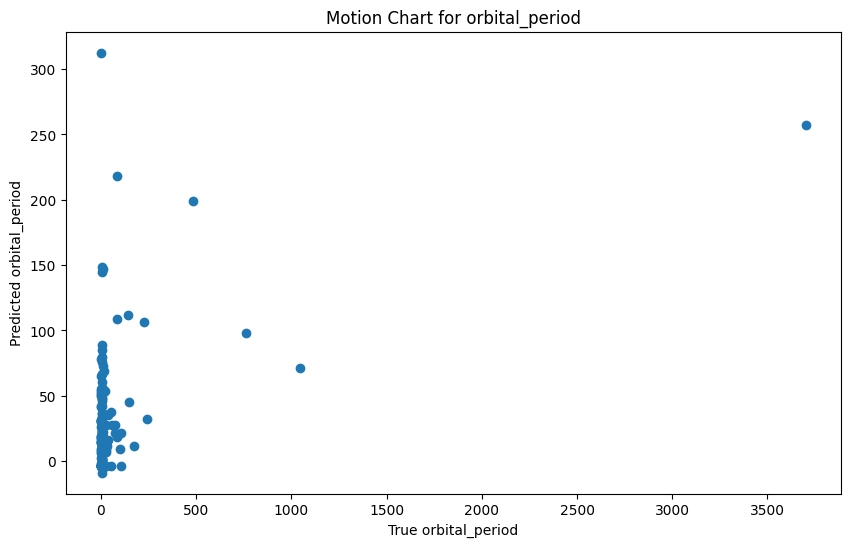

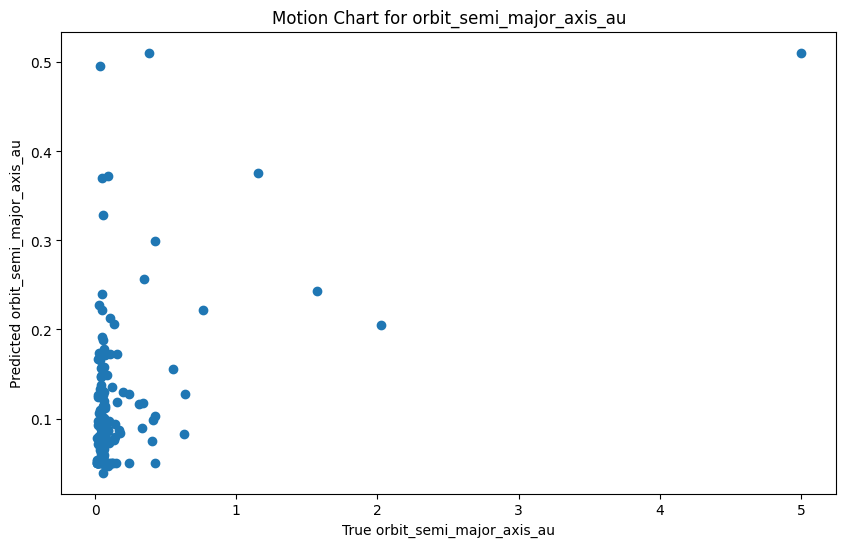

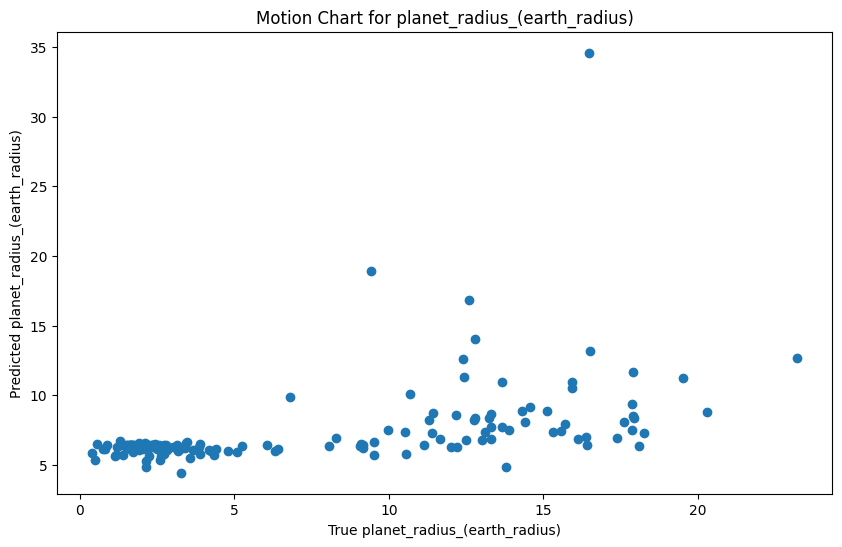

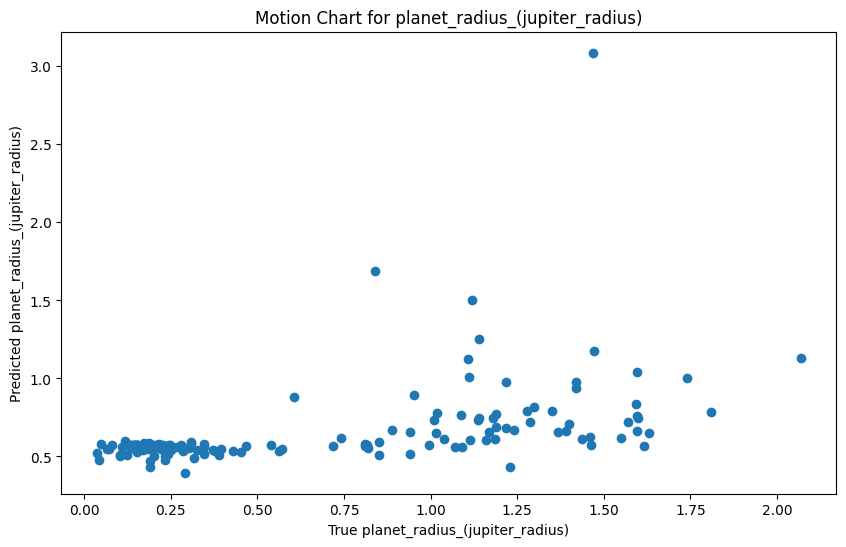

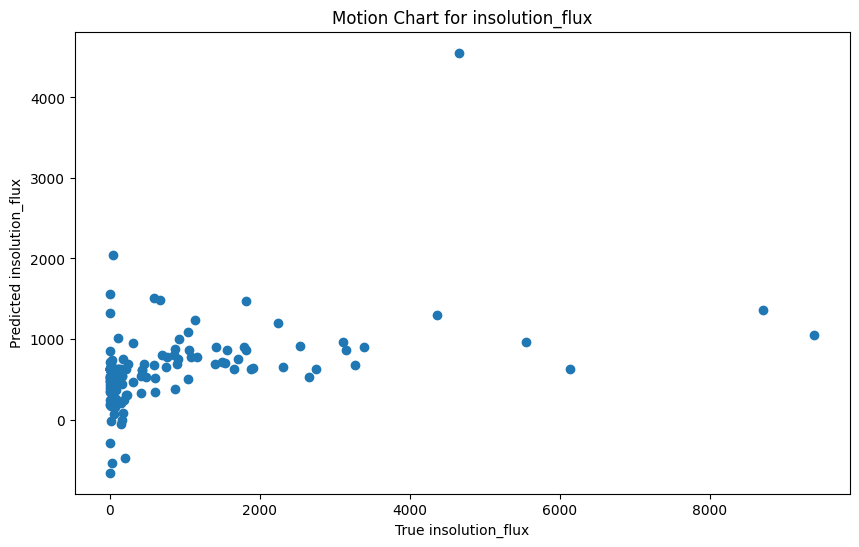

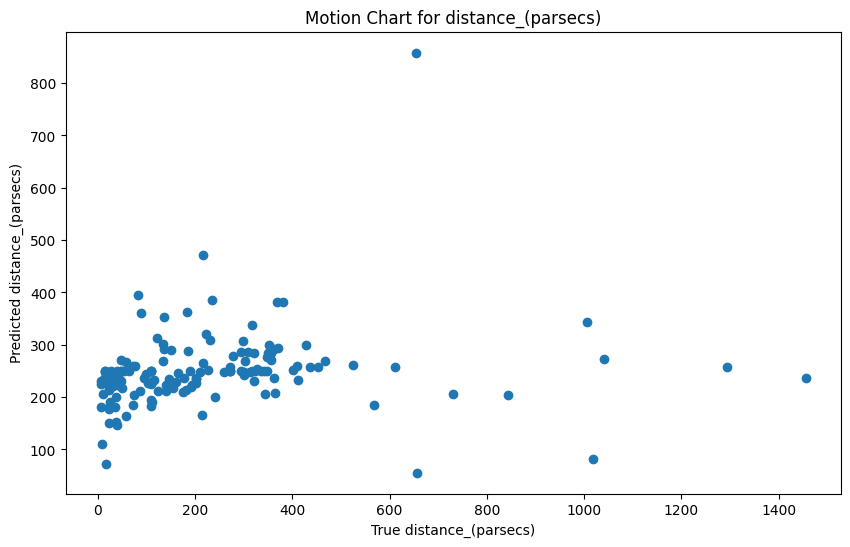

In [6]:
for i, col in enumerate(y_test.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[col], model1.predict(X_test)[:, i], 'o')  # Select the corresponding prediction column
    plt.xlabel(f'True {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Motion Chart for {col}')
    plt.show()

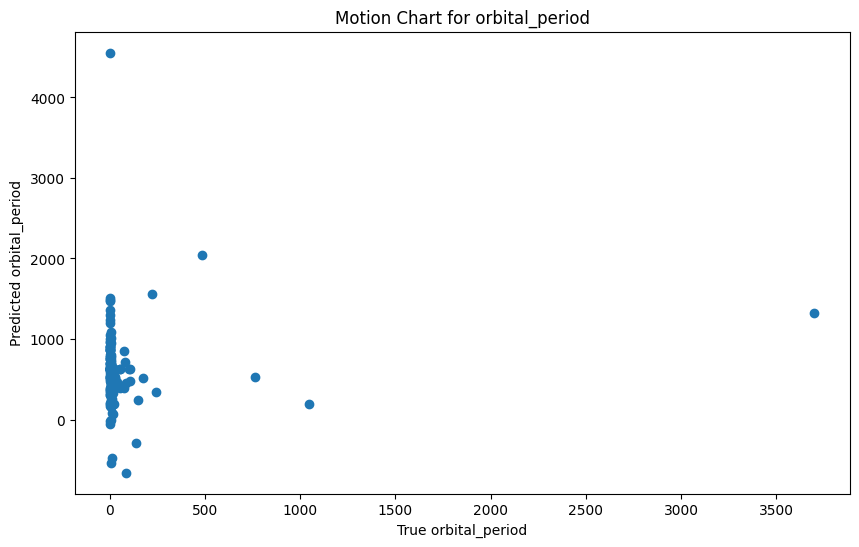

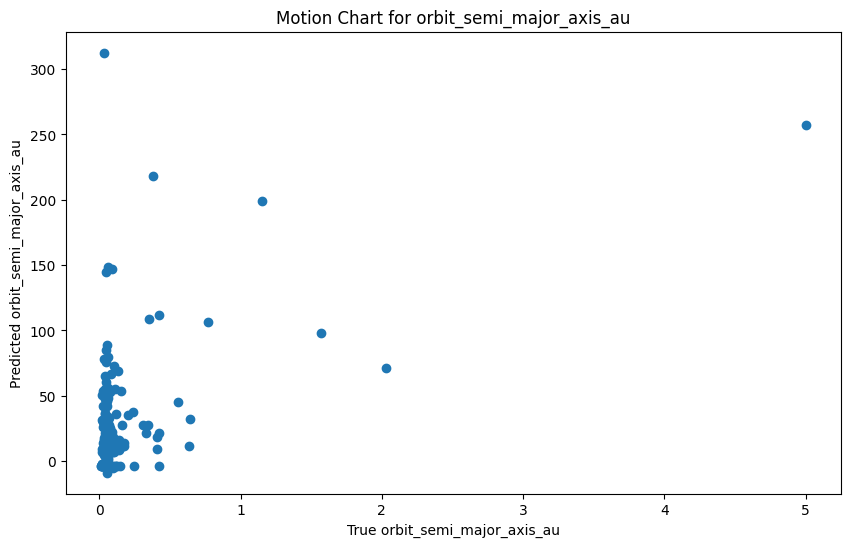

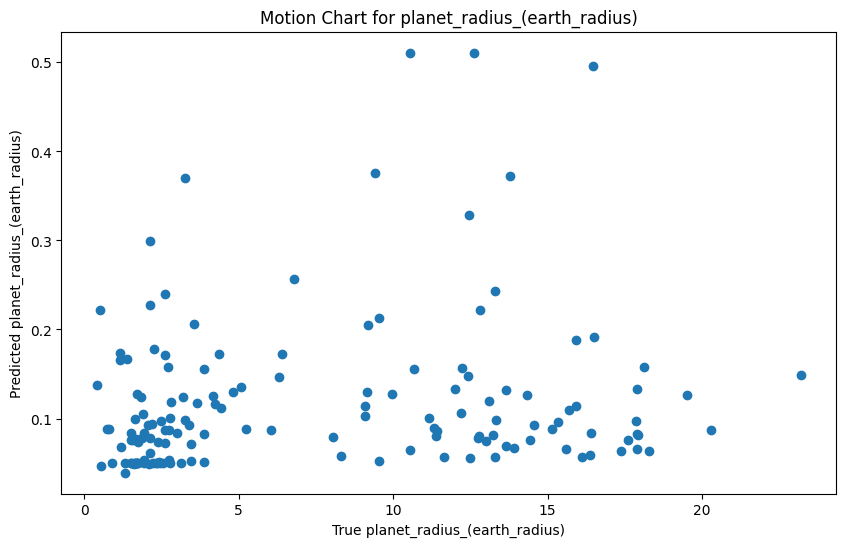

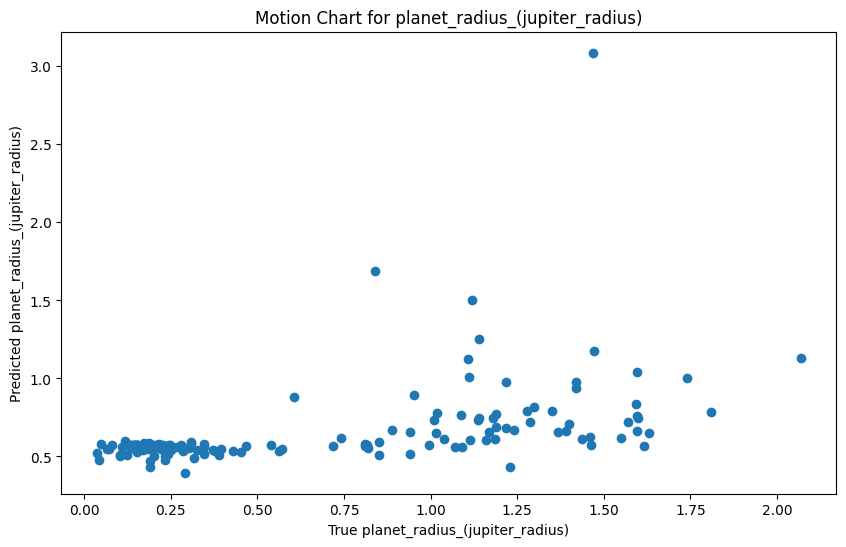

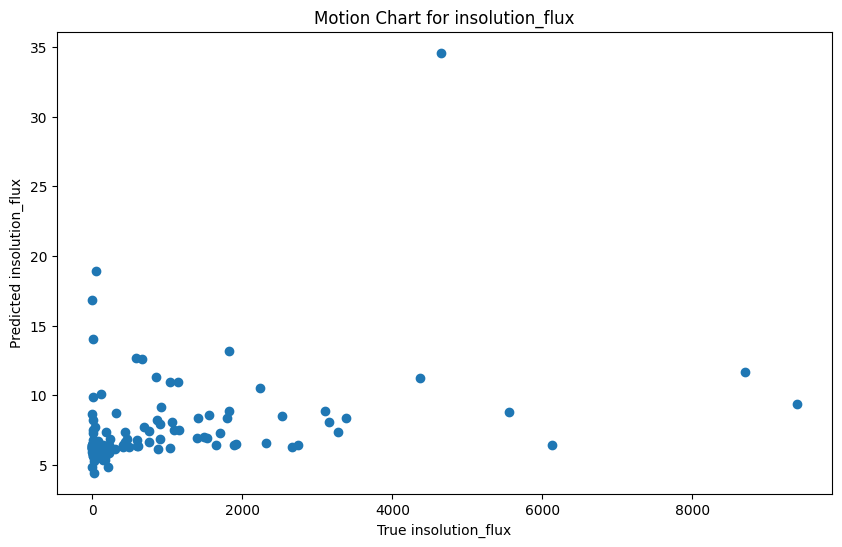

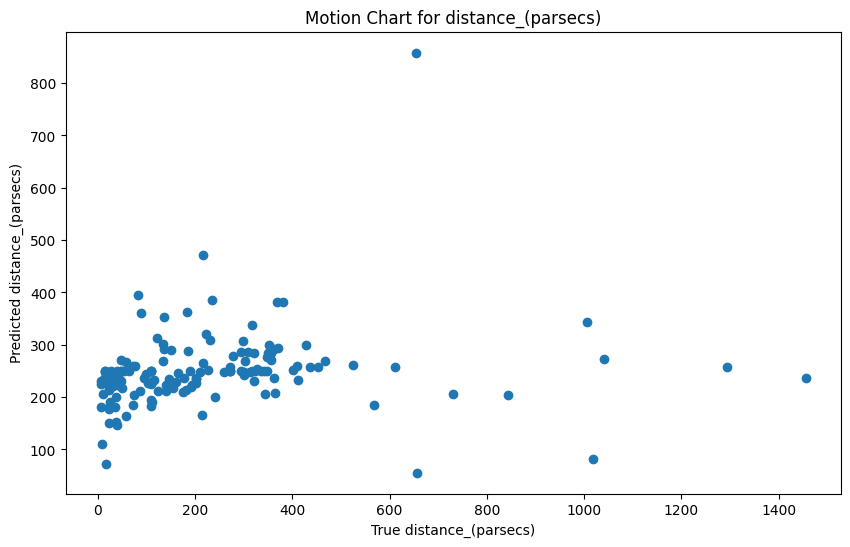

In [ ]:
# Assuming you want to plot predictions against each target variable separately:
for i, col in enumerate(y_test.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[col], model.predict(X_test)[:, i], 'o')  # Select the corresponding prediction column
    plt.xlabel(f'True {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Motion Chart for {col}')
    plt.show()

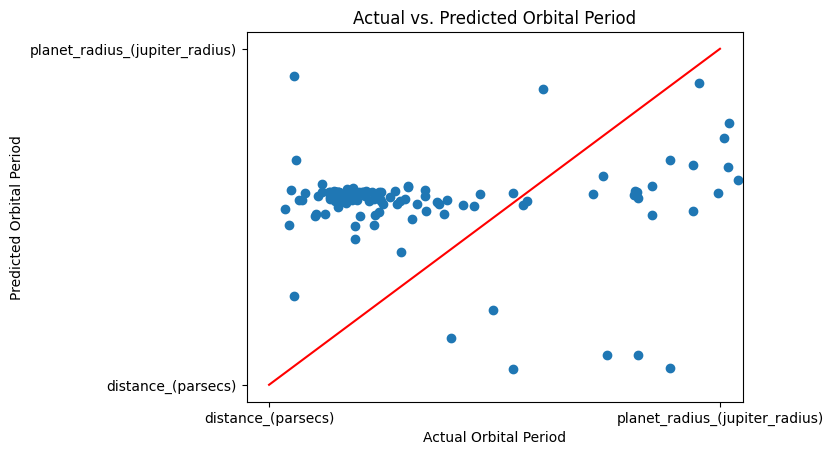

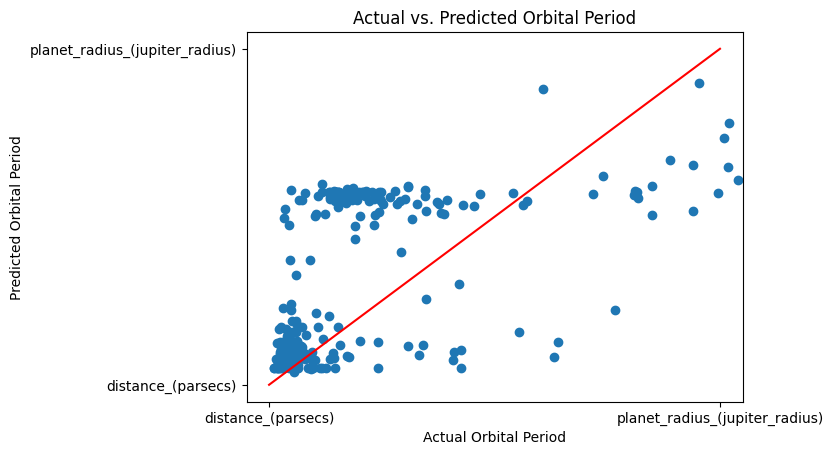

In [ ]:
# prompt: plot the predictions

# Create a scatter plot of the actual and predicted values
plt.scatter(y_test, model.predict(X_test))

# Add a line plot of the perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Label the axes and title
plt.xlabel("Actual Orbital Period")
plt.ylabel("Predicted Orbital Period")
plt.title("Actual vs. Predicted Orbital Period")

# Show the plot
plt.show()
################################# Different charts
# Create a scatter plot of the actual and predicted values
plt.scatter(y_test, model1.predict(X_test))

# Add a line plot of the perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Label the axes and title
plt.xlabel("Actual Orbital Period")
plt.ylabel("Predicted Orbital Period")
plt.title("Actual vs. Predicted Orbital Period")

# Show the plot
plt.show()


In [ ]:
# prompt: group all the planets in planet_name column where the stellar_surface_gravity_log10_(cm/s**2) is close to earths

earth_gravity_log10 = np.log10(9.80665 * 100)  # Calculate Earth's gravity in cm/s^2 and take log10

# Define a threshold for closeness to Earth's gravity
threshold = 0.5

# Group planets based on their stellar surface gravity
grouped_planets = exo_pl_dta_df.groupby(
    pd.cut(exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'],
           bins=[-np.inf, earth_gravity_log10 - threshold, earth_gravity_log10 + threshold, np.inf],
           labels=['Lower Gravity', 'Similar Gravity', 'Higher Gravity'])
)['planet_name'].apply(list)

# Print the groups
for group_name, planets in grouped_planets.items():
    print(f"{group_name}: {planets}")


Lower Gravity: []
Similar Gravity: ['HAT-P-56 b', 'Kepler-91 b']
Higher Gravity: ['HD 77946 b', 'TOI-1135 b', 'TOI-1386 b', 'TOI-1386 c', 'TOI-238 b', 'TOI-238 c', 'TOI-4515 b', 'TOI-4438 b', "Teegarden's Star d", 'Wolf 327 b', 'WASP-193 b', 'TOI-5293 A b', 'TOI-5398 c', 'TOI-5678 b', 'TOI-615 b', 'TOI-700 e', 'TOI-733 b', 'TOI-778 b', 'TOI-784 b', 'TOI-836 b', 'TOI-836 c', 'TOI-622 b', 'TOI-858 B b', 'TOI-908 b', 'TOI-4860 b', 'TOI-5126 b', 'TOI-5126 c', 'TOI-4127 b', 'TOI-5205 b', 'TOI-4562 b', 'TOI-4600 b', 'TOI-4600 c', 'TOI-4603 b', 'TOI-3235 b', 'TOI-332 b', 'TOI-3984 A b', 'TOI-4010 b', 'TOI-4010 c', 'TOI-4010 d', 'TOI-4010 e', 'TOI-3785 b', 'TOI-4201 b', 'TOI-2525 b', 'TOI-2525 c', 'TOI-2641 b', 'TOI-2010 b', 'TOI-2095 b', 'TOI-2095 c', 'TOI-2096 b', 'TOI-2096 c', 'TOI-2152 A b', 'TOI-2134 b', 'TOI-2134 c', 'TOI-181 b', 'TOI-1853 b', 'TOI-199 b', 'TOI-1416 b', 'TOI-1470 b', 'TOI-1470 c', 'LP 791-18 d', 'HN Lib b', 'HD 15906 b', 'HD 15906 c', 'HD 207496 b', 'GJ 3988 b', 'GJ 724 

In [ ]:
# prompt: how many planets are in the higher gravity group
# I wanted to find the how many was the high gravity catagory
higher_gravity_planets = grouped_planets['Higher Gravity']
number_of_planets = len(higher_gravity_planets)
print(f"Number of planets in the higher gravity group: {number_of_planets}")


Number of planets in the higher gravity group: 739


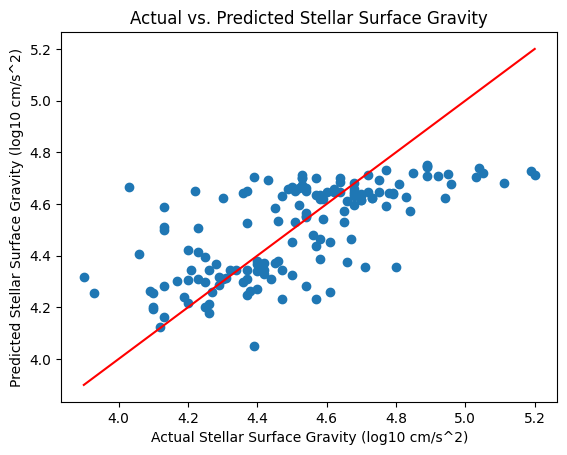

In [ ]:
# prompt: plot the predictions
# Predictions from a old test from an old order I did not save
# Create a scatter plot of the actual and predicted values
plt.scatter(y_test, model.predict(X_test))

# Add a line plot of the perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Label the axes and title
plt.xlabel("Actual Stellar Surface Gravity (log10 cm/s^2)")
plt.ylabel("Predicted Stellar Surface Gravity (log10 cm/s^2)")
plt.title("Actual vs. Predicted Stellar Surface Gravity")

# Show the plot
plt.show()


In [10]:
# prompt: from the similar gravity group and higher gravity group make a Machine Learning algorithm to predict the patterns of orbital_period using 'planet_mass_(earth_mass)', 'planet_mass_(jupiter_mass)', 'planet_eccentricity', 'insolution_flux', 'orbital_period', 'orbit_semi_major_axis_au', 'planet_radius_(jupiter_radius)', 'planet_radius_(earth_radius)', 'distance_(parsecs)'.
# Again another test I was experimenting with the x and y values

# Define earth_gravity_log10 and threshold (assuming they were defined in a previous cell)
earth_gravity_log10 = np.log10(9.80665 * 100)
threshold = 0.5

similar_gravity_df = exo_pl_dta_df[exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'].between(earth_gravity_log10 - threshold, earth_gravity_log10 + threshold)]
higher_gravity_df = exo_pl_dta_df[exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'] > earth_gravity_log10 + threshold]

# Combine the dataframes
combined_df = pd.concat([similar_gravity_df, higher_gravity_df])

# Separate features and target
X = combined_df[['planet_mass_(earth_mass)', 'planet_mass_(jupiter_mass)', 'planet_eccentricity', 'insolution_flux', 'orbital_period', 'orbit_semi_major_axis_au', 'planet_radius_(jupiter_radius)', 'planet_radius_(earth_radius)', 'distance_(parsecs)']]
y = combined_df['orbital_period']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Evaluate the model on the test set
score3 = model3.score(X_test, y_test)

# Print the model score and predictions
print("Model score:", score3)
print("Predictions:", model3.predict(X_test))


Model score: 1.0
Predictions: [7.51237488e+01 5.50870018e+01 4.23370028e+00 3.40883493e+00
 2.11701965e+01 3.58572006e+00 5.70588016e+00 5.60835218e+00
 9.59640980e-01 2.17479992e+00 1.85961075e+01 3.77794003e+00
 7.36547410e-01 1.55019198e+01 3.27623010e+00 1.73071308e+01
 7.90753984e+00 1.46711898e+00 2.50031090e+00 5.41465378e+00
 2.17467427e+00 1.29159999e+00 5.35000000e+01 3.56004000e+00
 2.90367007e+00 2.44510002e+01 3.44471407e+00 1.76670875e+01
 4.04604340e+00 5.72318983e+00 2.28910408e+01 1.75059998e+02
 8.01094341e+00 3.52474856e+00 5.60081902e+01 6.94420004e+00
 5.35179997e+00 5.18233120e-01 1.18992996e+01 4.82819092e+02
 8.04100037e+00 5.34088802e+00 2.89969993e+00 4.11379003e+00
 3.49150991e+00 7.57399979e+01 3.37264991e+00 2.61299992e+01
 9.48971176e+00 6.44100809e+00 8.48395996e+01 1.24417000e+01
 2.69155002e+00 1.10620098e+01 3.79984689e+00 9.55000000e+01
 4.75614977e+00 1.34849775e+00 1.58040452e+00 5.71493196e+00
 1.05356384e+02 6.69140577e-01 7.13351393e+00 3.7970180

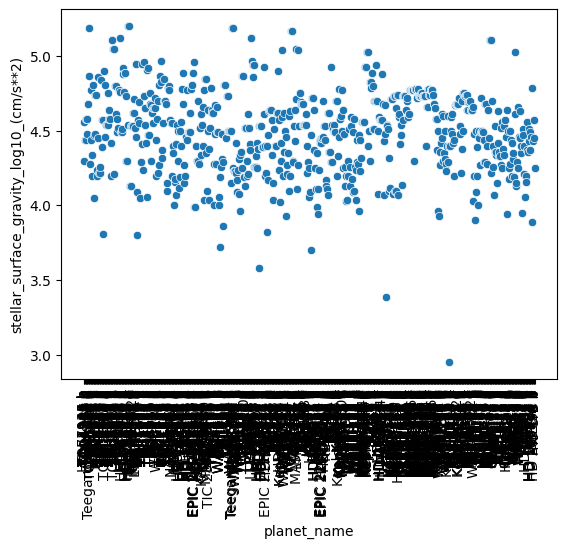

In [ ]:
# prompt: show the relationship between the planets in column planet_name stellar_surface_gravity_log10_(cm/s**2)
# Old test when I was trying to plot all the planet and see which has similar stellar surface gravity
# One of those problems and inconsistences I ran into

sns.scatterplot(x="planet_name", y="stellar_surface_gravity_log10_(cm/s**2)", data=exo_pl_dta_df)
plt.xticks(rotation=90)
plt.show()


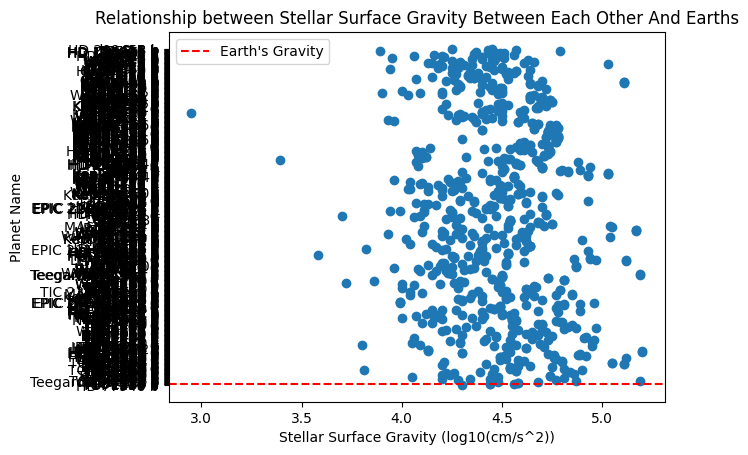

In [ ]:
# Another test to try and see if there are any planets that share earths stellar surface gravity
# This test actually helped me think to narrow it down some

# Calculate Earth's stellar_surface_gravity_log10_(cm/s^2)
earth_gravity = 9.80665 # m/s^2
earth_gravity_log10 = np.log10(earth_gravity * 100) # convert to cm/s^2 and take log10

# Plot a horizontal line for Earth's gravity
plt.axhline(y=earth_gravity_log10, color='red', linestyle='--', label='Earth\'s Gravity')

# Show the plot again
plt.scatter(exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'], exo_pl_dta_df['planet_name'])
plt.xlabel('Stellar Surface Gravity (log10(cm/s^2))')
plt.ylabel('Planet Name')
plt.title('Relationship between Stellar Surface Gravity Between Each Other And Earths')
plt.legend()
plt.show()

In [ ]:
# prompt: what is HAT-P-56 b and Kepler-91 b stellar_mass_(solar_mass) compared to the sun
# Again just experimenting with with ideas trying to get ideas

sun_mass = 1.0

hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stellar_mass = hat_p_56_b_data['stellar_mass_(solar_mass)'].values[0]
kepler_91_b_stellar_mass = kepler_91_b_data['stellar_mass_(solar_mass)'].values[0]

print(f"HAT-P-56 b stellar mass compared to the Sun: {hat_p_56_b_stellar_mass / sun_mass:.2f}")
print(f"Kepler-91 b stellar mass compared to the Sun: {kepler_91_b_stellar_mass / sun_mass:.2f}")


HAT-P-56 b stellar mass compared to the Sun: 1.42
Kepler-91 b stellar mass compared to the Sun: 1.31


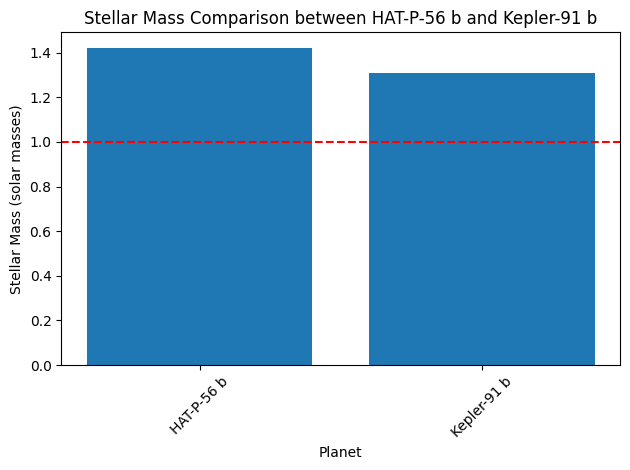

In [ ]:
# prompt:  graph to show visualization of the of the difference between HAT-P-56 b and Kepler-91 b stellar_mass_(solar_mass) compared to the sun
# Just wanted to see how much of a difference between the 2 solar masses that they evolve around compared to our sun

import matplotlib.pyplot as plt

sun_mass = 1.0

hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stellar_mass = hat_p_56_b_data['stellar_mass_(solar_mass)'].values[0]
kepler_91_b_stellar_mass = kepler_91_b_data['stellar_mass_(solar_mass)'].values[0]

planets = ['HAT-P-56 b', 'Kepler-91 b']
stellar_masses = [hat_p_56_b_stellar_mass / sun_mass, kepler_91_b_stellar_mass / sun_mass]

fig, ax = plt.subplots()

ax.bar(planets, stellar_masses)

ax.set_xlabel('Planet')
ax.set_ylabel('Stellar Mass (solar masses)')
ax.set_title('Stellar Mass Comparison between HAT-P-56 b and Kepler-91 b')
ax.axhline(y=1.0, color='red', linestyle='--', label='Sun')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: what is the number_of_stars, number_of_planets HAT-P-56 b, Kepler-91 b have
# During my Analysis I wondered how many planets they have in their planetary systems
hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stars = hat_p_56_b_data['number_of_stars'].values[0]
kepler_91_b_stars = kepler_91_b_data['number_of_stars'].values[0]

hat_p_56_b_planets = hat_p_56_b_data['number_of_planets'].values[0]
kepler_91_b_planets = kepler_91_b_data['number_of_planets'].values[0]

print(f"HAT-P-56 b number of stars: {hat_p_56_b_stars}")
print(f"Kepler-91 b number of stars: {kepler_91_b_stars}")
print(f"HAT-P-56 b number of planets: {hat_p_56_b_planets}")
print(f"Kepler-91 b number of planets: {kepler_91_b_planets}")


HAT-P-56 b number of stars: 1
Kepler-91 b number of stars: 1
HAT-P-56 b number of planets: 1
Kepler-91 b number of planets: 1
